In [216]:
%matplotlib notebook
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import numpy as np
from config import api_key
from pprint import pprint
import time
import datetime
import calendar

In [217]:
#Create an empty data frame with the items we want to find:
oscar_df="Oscar Best Picture 2000-2019.csv"
oscar_list=pd.read_csv(oscar_df,encoding="utf8")
oscar_list["Year"]=""
oscar_list["Metascore"]=""
oscar_list["Box Office"]=""
oscar_list["IMDB Vote"]=""
oscar_list["Director"]=""
oscar_list["Genre"]=""
oscar_list["Maker"]=""
oscar_list["Actors"]=""
oscar_list["Female"]=""
oscar_list["Male"]=""

In [136]:
# Fill in the information extracted from OMDB:
for index,row in oscar_list.iterrows():
    genre_info=[]
    try:
        movie_name=row["Best picture"]
        url = "http://www.omdbapi.com/?t="
        api_key1 = "&apikey=trilogy"
        movie_info=requests.get(url + movie_name + api_key1+"&plot=full").json()
        oscar_list.loc[index,"Year"]=movie_info['Year']
        oscar_list.loc[index,"Metascore"]=movie_info['Metascore']
        oscar_list.loc[index,"Box Office"]=movie_info['BoxOffice']
        oscar_list.loc[index,"IMDB Vote"]=movie_info['imdbVotes']
        oscar_list.loc[index,"Director"]=movie_info['Director']
        genre_info.append(movie_info['Genre'])
        genre=genre_info[0].split(',')
        oscar_list.loc[index,"Genre"]=genre[0]
        oscar_list.loc[index,"Maker"]=movie_info['Production']
        oscar_list.loc[index,"Actors"]=movie_info['Actors']
    
    
    except KeyError:
        oscar_list.loc[index,"Box Office"]=np.NaN
    
    
oscar_list=oscar_list.dropna(how='any')
oscar_list

,Best picture,Year,Metascore,Box Office,IMDB Vote,Director,Genre,Maker,Actors,Female,Male
0,Green Book,2018,69,N/A,"138,886",Peter Farrelly,Biography,Universal Pictures,"Viggo Mortensen, Mahershala Ali, Linda Cardell...",,
1,The Shape of Water,2017,87,"$57,393,976","292,314",Guillermo del Toro,Adventure,Fox Searchlight Pictures,"Sally Hawkins, Michael Shannon, Richard Jenkin...",,
2,Moonlight,2016,99,"$27,850,910","222,201",Barry Jenkins,Drama,A24 Films,"Mahershala Ali, Shariff Earp, Duan Sanderson, ...",,
3,Spotlight,2015,93,N/A,"358,606",Tom McCarthy,Crime,Open Road Films,"Mark Ruffalo, Michael Keaton, Rachel McAdams, ...",,
4,12 Years a Slave,2013,96,"$50,628,650","567,936",Steve McQueen,Biography,Fox Searchlight,"Chiwetel Ejiofor, Dwight Henry, Dickie Gravois...",,
5,Argo,2012,86,"$136,019,448","529,124",Ben Affleck,Biography,Warner Bros. Pictures,"Ben Affleck, Bryan Cranston, Alan Arkin, John ...",,
6,The Artist,2011,89,"$44,667,095","215,166",Michel Hazanavicius,Comedy,The Weinstein Company,"Jean Dujardin, Bérénice Bejo, John Goodman, Ja...",,
8,The Hurt Locker,2008,94,"$15,700,000","388,856",Kathryn Bigelow,Drama,Summit Entertainment,"Jeremy Renner, Anthony Mackie, Brian Geraghty,...",,
9,Slumdog Millionaire,2008,86,"$141,243,551","738,900","Danny Boyle, Loveleen Tandan(co-director)",Drama,Fox Searchlight Pictures,"Dev Patel, Saurabh Shukla, Anil Kapoor, Raj Zu...",,
10,No Country for Old Men,2007,91,"$74,223,625","755,743","Ethan Coen, Joel Coen",Crime,Miramax Films,"Tommy Lee Jones, Javier Bardem, Josh Brolin, W...",,


In [61]:
#Remove the dollar sign and redundant spaces:
oscar_list_refine=oscar_list.loc[oscar_list["Box Office"]!="N/A"]
oscar_list_refine["Box Office"]=oscar_list_refine["Box Office"].replace({'\$':''}, regex = True)
oscar_list_refine["Actors"]=oscar_list_refine["Actors"].replace({", ":","}, regex = True)
oscar_list_refine

C:\Users\eugene.chu1\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\eugene.chu1\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Best picture,Year,Metascore,Box Office,IMDB Vote,Director,Genre,Maker,Actors,Female,Male
1,The Shape of Water,2017,87,"57,393,976","292,314",Guillermo del Toro,Adventure,Fox Searchlight Pictures,"Sally Hawkins,Michael Shannon,Richard Jenkins,...",,
2,Moonlight,2016,99,"27,850,910","222,201",Barry Jenkins,Drama,A24 Films,"Mahershala Ali,Shariff Earp,Duan Sanderson,Ale...",,
4,12 Years a Slave,2013,96,"50,628,650","567,936",Steve McQueen,Biography,Fox Searchlight,"Chiwetel Ejiofor,Dwight Henry,Dickie Gravois,B...",,
5,Argo,2012,86,"136,019,448","529,124",Ben Affleck,Biography,Warner Bros. Pictures,"Ben Affleck,Bryan Cranston,Alan Arkin,John Goo...",,
6,The Artist,2011,89,"44,667,095","215,166",Michel Hazanavicius,Comedy,The Weinstein Company,"Jean Dujardin,Bérénice Bejo,John Goodman,James...",,
8,The Hurt Locker,2008,94,"15,700,000","386,920",Kathryn Bigelow,Drama,Summit Entertainment,"Jeremy Renner,Anthony Mackie,Brian Geraghty,Gu...",,
9,Slumdog Millionaire,2008,86,"141,243,551","738,900","Danny Boyle, Loveleen Tandan(co-director)",Drama,Fox Searchlight Pictures,"Dev Patel,Saurabh Shukla,Anil Kapoor,Raj Zutshi",,
10,No Country for Old Men,2007,91,"74,223,625","755,743","Ethan Coen, Joel Coen",Crime,Miramax Films,"Tommy Lee Jones,Javier Bardem,Josh Brolin,Wood...",,
11,The Departed,2006,85,"132,300,000","1,057,386",Martin Scorsese,Crime,Warner Bros. Pictures,"Leonardo DiCaprio,Matt Damon,Jack Nicholson,Ma...",,
12,Crash,2004,69,"55,382,847","398,598",Paul Haggis,Crime,Lions Gate Films,"Karina Arroyave,Dato Bakhtadze,Sandra Bullock,...",,


In [73]:
#Count the numbers of male and female actors
base_url="https://gender-api.com/get?"
for index,row in oscar_list_refine.iterrows():
    actor_list=[]
    actor_list.append(oscar_list_refine.loc[index,"Actors"])
    actor_total=actor_list[0].split(',')
    male_count=0
    female_count=0
    
    for actor in actor_total:

        gender_check_url=f"{base_url}name={actor}&key={api_key2}"
        gender_response=requests.get(gender_check_url).json()
        if gender_response['gender']=='male':
            male_count+=1
        elif gender_response['gender']=='female':
            female_count+=1
            
    oscar_list_refine.loc[index,"Female"]=female_count
    oscar_list_refine.loc[index,"Male"]=male_count
    

C:\Users\eugene.chu1\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eugene.chu1\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Best picture,Year,Metascore,Box Office,IMDB Vote,Director,Genre,Maker,Actors,Female,Male
1,The Shape of Water,2017,87,"57,393,976","292,314",Guillermo del Toro,Adventure,Fox Searchlight Pictures,"Sally Hawkins,Michael Shannon,Richard Jenkins,...",1,3
2,Moonlight,2016,99,"27,850,910","222,201",Barry Jenkins,Drama,A24 Films,"Mahershala Ali,Shariff Earp,Duan Sanderson,Ale...",0,4
4,12 Years a Slave,2013,96,"50,628,650","567,936",Steve McQueen,Biography,Fox Searchlight,"Chiwetel Ejiofor,Dwight Henry,Dickie Gravois,B...",0,4
5,Argo,2012,86,"136,019,448","529,124",Ben Affleck,Biography,Warner Bros. Pictures,"Ben Affleck,Bryan Cranston,Alan Arkin,John Goo...",0,4
6,The Artist,2011,89,"44,667,095","215,166",Michel Hazanavicius,Comedy,The Weinstein Company,"Jean Dujardin,Bérénice Bejo,John Goodman,James...",0,4
8,The Hurt Locker,2008,94,"15,700,000","386,920",Kathryn Bigelow,Drama,Summit Entertainment,"Jeremy Renner,Anthony Mackie,Brian Geraghty,Gu...",0,4
9,Slumdog Millionaire,2008,86,"141,243,551","738,900","Danny Boyle, Loveleen Tandan(co-director)",Drama,Fox Searchlight Pictures,"Dev Patel,Saurabh Shukla,Anil Kapoor,Raj Zutshi",0,4
10,No Country for Old Men,2007,91,"74,223,625","755,743","Ethan Coen, Joel Coen",Crime,Miramax Films,"Tommy Lee Jones,Javier Bardem,Josh Brolin,Wood...",0,4
11,The Departed,2006,85,"132,300,000","1,057,386",Martin Scorsese,Crime,Warner Bros. Pictures,"Leonardo DiCaprio,Matt Damon,Jack Nicholson,Ma...",0,4
12,Crash,2004,69,"55,382,847","398,598",Paul Haggis,Crime,Lions Gate Films,"Karina Arroyave,Dato Bakhtadze,Sandra Bullock,...",2,2


In [5]:
#Convert the month from string to number:
def month_convert(mon):
    abbr_to_num = {name: num for num, name in enumerate(calendar.month_abbr) if num}
    return(abbr_to_num[mon])


In [140]:
#Break down and generate the Released Schedule:
refine_list_df=pd.read_csv("movie_list_after_refine.csv",encoding="utf8")
del refine_list_df["Unnamed: 0"]
refine_list_df["Released Schedule"]=""
refine_list_df["Released Year"]=""
refine_list_df["Released Month"]=""
refine_list_df["Released Date"]=""

for index,row in refine_list_df.iterrows():
    date=[]
    moviename_refine=row["Best picture"]
    url = "http://www.omdbapi.com/?t="
    api_key1 = "&apikey=trilogy"
    movieinfo_refine=requests.get(url + moviename_refine + api_key1+"&plot=full").json()
    refine_list_df.loc[index,"Released Schedule"]=movieinfo_refine["Released"]
    date.append(movieinfo_refine["Released"])
    month_info=date[0].split(' ')
    refine_list_df.loc[index,"Released Month"]=month_convert(month_info[1])
    refine_list_df.loc[index,"Released Date"]=month_info[0]
    refine_list_df.loc[index,"Released Year"]=month_info[2]
    
refine_list_df["Released Year"]=pd.to_numeric(refine_list_df["Released Year"])
refine_list_df["Released Date"]=pd.to_numeric(refine_list_df["Released Date"])
refine_list_df["Box Office"]=refine_list_df["Box Office"].str.replace(',', '').astype(int)

In [141]:
refine_list_df["Category"]=""
refine_list_df.iloc[0:13,15]="Oscar Best Picture"
refine_list_df.iloc[13:16,15]="Popular Movies"
refine_list_df

,Best picture,Year,Metascore,Box Office,IMDB Vote,Director,Genre,Maker,Actors,Female,Male,Released Schedule,Released Year,Released Month,Released Date,Category
0,The Shape of Water,2017,87,57393976,"292,314",Guillermo del Toro,Adventure,Fox Searchlight Pictures,"Sally Hawkins,Michael Shannon,Richard Jenkins,...",1,3,22 Dec 2017,2017,12,22,Oscar Best Picture
1,Moonlight,2016,99,27850910,"222,201",Barry Jenkins,Drama,A24 Films,"Mahershala Ali,Shariff Earp,Duan Sanderson,Ale...",0,4,18 Nov 2016,2016,11,18,Oscar Best Picture
2,12 Years a Slave,2013,96,50628650,"567,936",Steve McQueen,Biography,Fox Searchlight,"Chiwetel Ejiofor,Dwight Henry,Dickie Gravois,B...",0,4,08 Nov 2013,2013,11,8,Oscar Best Picture
3,Argo,2012,86,136019448,"529,124",Ben Affleck,Biography,Warner Bros. Pictures,"Ben Affleck,Bryan Cranston,Alan Arkin,John Goo...",0,4,12 Oct 2012,2012,10,12,Oscar Best Picture
4,The Artist,2011,89,44667095,"215,166",Michel Hazanavicius,Comedy,The Weinstein Company,"Jean Dujardin,Bérénice Bejo,John Goodman,James...",0,4,20 Jan 2012,2012,1,20,Oscar Best Picture
5,The Hurt Locker,2008,94,15700000,"386,920",Kathryn Bigelow,Drama,Summit Entertainment,"Jeremy Renner,Anthony Mackie,Brian Geraghty,Gu...",0,4,31 Jul 2009,2009,7,31,Oscar Best Picture
6,Slumdog Millionaire,2008,86,141243551,"738,900","Danny Boyle, Loveleen Tandan(co-director)",Drama,Fox Searchlight Pictures,"Dev Patel,Saurabh Shukla,Anil Kapoor,Raj Zutshi",0,4,25 Dec 2008,2008,12,25,Oscar Best Picture
7,No Country for Old Men,2007,91,74223625,"755,743","Ethan Coen, Joel Coen",Crime,Miramax Films,"Tommy Lee Jones,Javier Bardem,Josh Brolin,Wood...",0,4,21 Nov 2007,2007,11,21,Oscar Best Picture
8,The Departed,2006,85,132300000,"1,057,386",Martin Scorsese,Crime,Warner Bros. Pictures,"Leonardo DiCaprio,Matt Damon,Jack Nicholson,Ma...",0,4,06 Oct 2006,2006,10,6,Oscar Best Picture
9,Crash,2004,69,55382847,"398,598",Paul Haggis,Crime,Lions Gate Films,"Karina Arroyave,Dato Bakhtadze,Sandra Bullock,...",2,2,06 May 2005,2005,5,6,Oscar Best Picture


<IPython.core.display.Javascript object>


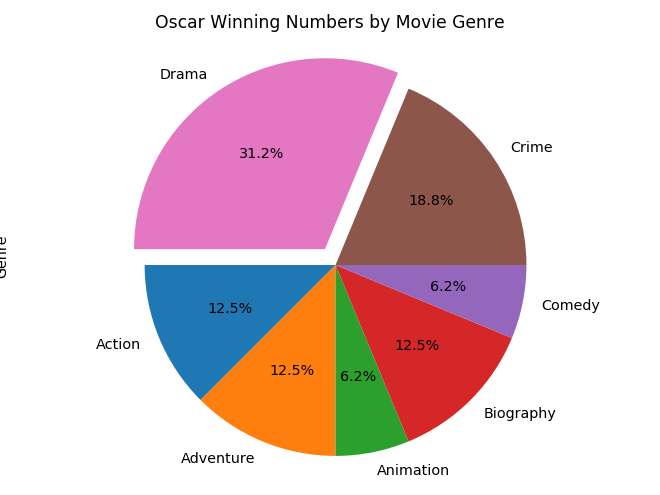

In [125]:
#Oscar Best Pictures by Movie Genre 
genre_groupby=refine_list_df.groupby("Genre")
genre_group=genre_groupby["Genre"].count()
genre_list=genre_group.keys()
explode=[0,0,0,0,0,0,0.1]
genre_box=genre_group.plot(kind="pie",y=genre_list,explode=explode,autopct="%1.1f%%",startangle=180,title="Oscar Winning Numbers by Movie Genre")
plt.tight_layout()
plt.axis("equal");
plt.savefig("Correlation Images/Numbers_by_Movie_Genre.png")

In [107]:
#Oscar Best Pictures by Movie Maker
maker_groupby=refine_list_df.groupby("Maker")
maker_group=maker_groupby["Maker"].count()
maker_group.plot(kind="bar",fontsize=12,title="Oscar Winning Numbers by Movie Maker")
plt.xlabel("Movie Maker",fontsize=13)
plt.ylabel("Winning Count",fontsize=13)
plt.xticks(rotation=80)
plt.tight_layout()
plt.savefig("Correlation Images/Numbers_by_Movie_Maker.png")

<IPython.core.display.Javascript object>


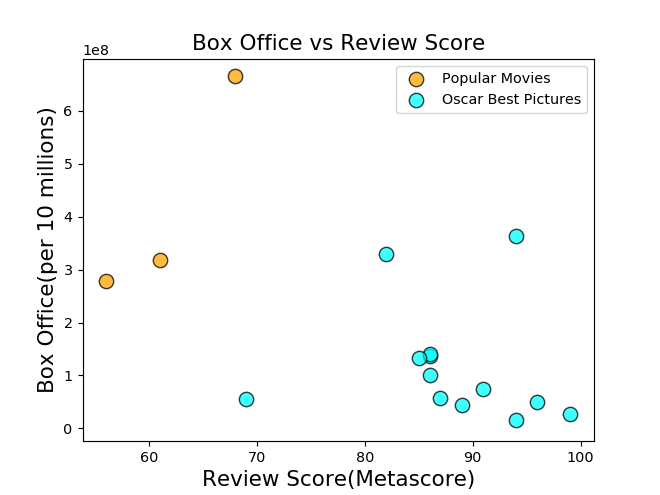

In [157]:
#Box Office vs Review Score
popular_movie_df=refine_list_df.loc[refine_list_df["Category"]=="Popular Movies"]
award_movie_df=refine_list_df.loc[refine_list_df["Category"]!="Popular Movies"]
popular_movie_corr=popular_movie_df.plot(kind="scatter",x="Metascore",y="Box Office",c="orange",edgecolor="black",s=100,alpha=0.75,label="Popular Movies")
combined_movie_corr=award_movie_df.plot(kind="scatter",x="Metascore",y="Box Office",c="cyan",edgecolor="black",s=100,alpha=0.75,label="Oscar Best Pictures",ax=popular_movie_corr)
plt.xlabel("Review Score(Metascore)",fontsize=15)
plt.ylabel("Box Office(per 10 millions)",fontsize=15)
plt.title("Box Office vs Review Score",fontsize=15)
plt.savefig("Correlation Images/Box_Office_vs_Review_Score.png")

<IPython.core.display.Javascript object>


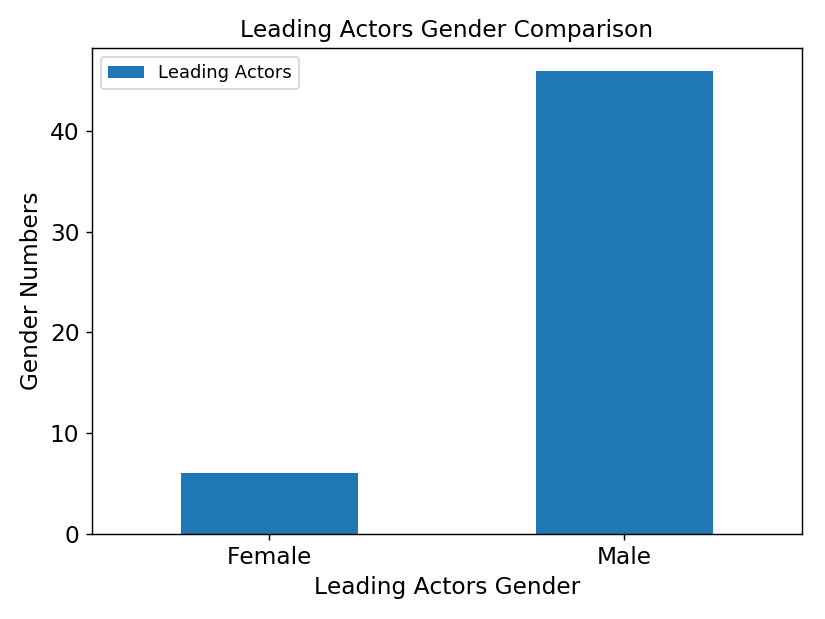

In [183]:
#Leading Actors Gender Comparison
female_award=award_movie_df["Female"].sum()
male_award=award_movie_df["Male"].sum()
total_award=pd.DataFrame({"Gender":["Female","Male"],"Leading Actors":[female_award,male_award]})
gender_kind=total_award["Gender"].tolist()
x_axis=np.arange(0,len(gender_kind))
total_award.plot(kind="bar",title="Leading Actors Gender Comparison",fontsize=13)
plt.xticks(x_axis,gender_kind,rotation=0)
plt.xlabel("Leading Actors Gender",fontsize=13)
plt.ylabel("Gender Numbers",fontsize=13)
plt.title("Leading Actors Gender Comparison",fontsize=13)
plt.tight_layout()
plt.savefig("Correlation Images/Leading_Actors_Gender_Comparison.png")

<IPython.core.display.Javascript object>


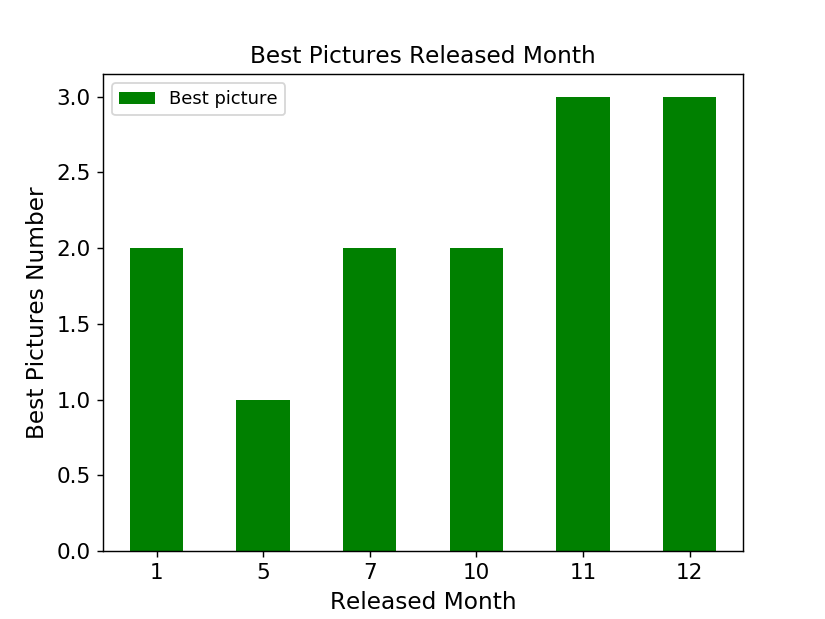

In [215]:
#Best Pictures Released Month
best_list_df=refine_list_df.loc[refine_list_df["Category"]=="Oscar Best Picture",:]
movie_month=best_list_df.groupby(["Released Month"])
movie_by_month=pd.DataFrame(movie_month["Best picture"].count())

month_df=movie_by_month.reset_index()
month_list=month_df["Released Month"].tolist()
month_axis=np.arange(0,len(month_list))

movie_by_month.plot(kind='bar',color='green',fontsize=12)
plt.xlabel("Released Month",fontsize=13)
plt.ylabel("Best Pictures Number",fontsize=13)
plt.xticks(month_axis,month_list,rotation=0)
plt.title("Best Pictures Released Month",fontsize=13)
plt.savefig("Correlation Images/Best_Pictures_Released_Month.png")